In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time
from tqdm import *

In [2]:
class Neural_Network(object):
    def __init__(self):
        # Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 2
        
        # Weights (Parameters) - Create matrix - Row, Cols
        self.W1 = 2 * np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = 2 * np.random.rand(self.hiddenLayerSize, self.outputLayerSize)
        
        # Bias
        self.B1 = 2 * np.random.rand(1, 2) - 1
        self.B2 = 2 * np.random.rand(1, 1) - 1
        
        # Hyperbolic tangent prime
    def tanhPrime(self, z):
        return (4 / (((math.e ** -z) + math.e ** z) ** 2))
        
    def forward(self, X):
        # Propogate to 2nd layer
        self.z2 = np.dot(X, self.W1)
        # Adding bias before activation layer
        self.z2 += self.B1
        # Activation function (Hyperbolic tangent)
        self.a2 = np.tanh(self.z2)
        # Propogate to the 3rd layer
        self.z3 = np.dot(self.a2, self.W2)
        # Adding bias before activation layer
        self.z3 += self.B2
        # Activation function (Hyperbolic tangent)
        yHat = np.tanh(self.z3)
        return yHat
    
    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5 * sum((y - self.yHat) ** 2)
        return J
    
    def costFunctionPrime(self, X, y):
        # Compute derivate with respect to W1 and W2
        self.yHat = self.forward(X)
        # Last Layer
        delta4 = np.multiply(-(y - self.yHat), self.tanhPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta4)
        # Middle Layer
        delta3 = np.dot(delta4, self.W2.T) * self.tanhPrime(self.z2)
        dJdW1 = np.dot(X.T, delta3)
        
        #Bias
        dJdB1 = delta3
        dJdB2 = delta4
        
        return dJdW1, dJdW2, dJdB1, dJdB2
        

In [3]:
# def tanhPrime(z):
#         return (4 / (((math.e ** -z) + math.e ** z) ** 2))
    
# # Hyperbolic tangent function
# testInput = np.arange(-5, 5, .01)
# plt.plot(testInput, np.tanh(testInput), linewidth = 2)
# plt.plot(testInput, tanhPrime(testInput), linewidth = 2)
# plt.grid(True)
# plt.show()

# print(tanhPrime(5))


In [4]:
NN = Neural_Network()
rate = 0.001

In [5]:
def XOR(x):
    a, b = zip(*x)
    result = np.multiply(a, b)
    a = []
    for i in result:
        if i > 0: a.append(1)
        else: a.append(-1)
    a = np.array(a)
    return a

X = np.empty(shape=[0, 2])
Y = np.empty(shape=[0, 1])


for i in range(0, 100):
    a = 2 * np.random.rand(1, 2) - 1
    X = np.vstack([X, a])
    b = XOR(a)
    Y = np.vstack([Y, b])

# X1 = 2 * np.random.rand(1, 2) - 1
# Y1 = XOR(X1).reshape(1, 1)

# Training Time
for i in tqdm(range(0, 1000)):
    for j in range(0, 100):
        x = X[j].reshape(2, 1).T
        y = Y[j].reshape(1, 1)
        
        cost = NN.costFunction(x, y)

        dJdW1, dJdW2, dJdB1, dJdB2 = NN.costFunctionPrime(x, y)
        NN.W1 = NN.W1 - rate * dJdW1
        NN.W2 = NN.W2 - rate * dJdW2

        NN.B1 = NN.B1 - rate * dJdB1
        NN.B2 = NN.B2 - rate * dJdB2
    
    if i % 100 == 0: print(cost)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

[ 0.00508314]


  9%|██████▊                                                                        | 87/1000 [00:00<00:05, 166.41it/s]

[ 0.04107984]


 19%|██████████████▉                                                               | 192/1000 [00:01<00:04, 169.96it/s]

[ 0.24929395]


 30%|███████████████████████▏                                                      | 298/1000 [00:01<00:04, 170.57it/s]

[ 0.26035986]


 39%|██████████████████████████████▎                                               | 388/1000 [00:02<00:03, 170.35it/s]

[ 0.21751579]


 50%|██████████████████████████████████████▌                                       | 495/1000 [00:02<00:02, 169.88it/s]

[ 0.19832084]


 58%|█████████████████████████████████████████████▍                                | 583/1000 [00:03<00:02, 170.16it/s]

[ 0.19695061]


 69%|█████████████████████████████████████████████████████▉                        | 691/1000 [00:04<00:01, 171.21it/s]

[ 0.19683087]


 80%|██████████████████████████████████████████████████████████████▎               | 799/1000 [00:04<00:01, 171.01it/s]

[ 0.19693429]


 88%|█████████████████████████████████████████████████████████████████████         | 885/1000 [00:05<00:00, 165.10it/s]

[ 0.19698737]


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.45it/s]


<IPython.core.display.Javascript object>


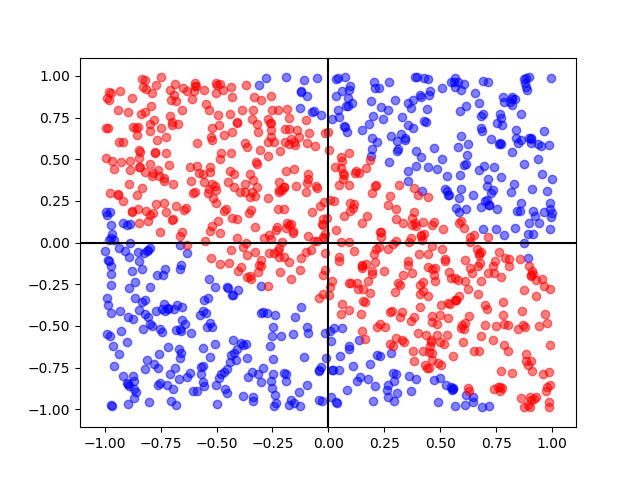

In [6]:
%matplotlib notebook

#Test
X = 2 * np.random.rand(1000, 2) - 1
hy = NN.forward(X)

dataP = np.empty(shape = [0, 2])
dataN = np.empty(shape = [0, 2])

for i in range(0, 1000):
    if hy[i] > 0:
        dataP = np.vstack([dataP, X[i]])
    else:
        dataN = np.vstack([dataN, X[i]])
        
# Graph Scatter Plot
fig, ax = plt.subplots()
ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

# Unpack the matrix
x1, y1 = zip(*dataP)
x2, y2 = zip(*dataN)
    
plt.scatter(x1 , y1, c = 'blue', alpha = 0.5)
plt.scatter(x2 , y2, c = 'red', alpha = 0.5)
plt.show()

In [7]:
# print('Input\n', X, '\n')
# print('Expected Output\n', y, '\n')
# print('Hypothesized Output\n', hy, '\n')

# print('Weight 1\n', NN.W1, '\n')
# print('Weight 2\n', NN.W2, '\n')

# print('Bias 1\n', NN.B1, '\n')
# print('Bias 2\n', NN.B2, '\n')